## Makemore part 2 - The MLP approach

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt #making figures
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
def build_dataset(words):
    block_size = 3
    X,Y=[],[]
    for w in words:
        # print(w)
        context=[0]*block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context),'--->',itos[ix])
            context= context[1:]+[ix]
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape)
    print(Y.shape)
    return X,Y
import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))
Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3])
torch.Size([182625])
torch.Size([22655, 3])
torch.Size([22655])
torch.Size([22866, 3])
torch.Size([22866])


In [9]:
print(Y)
print(X)

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])
tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])


In [6]:
Xtr.shape, Xtr.dtype, Ytr.shape,Ytr.dtype

(torch.Size([182625, 3]), torch.int64, torch.Size([182625]), torch.int64)

### Build a lookup table to convert the word/character embeddings to a lower dimensional space

In [5]:
C= torch.randn(27,2)
C

tensor([[ 0.1853,  2.0442],
        [-2.2210, -1.4347],
        [-0.2618, -0.4687],
        [-0.1642, -1.6523],
        [ 0.4704,  0.9576],
        [ 0.7279,  0.2522],
        [-1.1569, -2.6933],
        [-0.1143, -0.7349],
        [-0.5709, -1.0384],
        [-0.4363,  0.0311],
        [-0.5392, -1.4578],
        [-0.6646, -0.3867],
        [-0.1427, -0.9355],
        [ 0.4362,  1.4367],
        [ 1.0341, -0.0276],
        [ 1.7774,  0.1020],
        [-1.5416,  0.0819],
        [-0.3619, -0.5676],
        [ 0.7219, -1.4790],
        [ 1.0967,  0.8520],
        [ 0.3112, -0.7312],
        [ 0.6255,  0.9200],
        [-1.0418, -0.8804],
        [ 0.7915, -0.4984],
        [-0.3284, -1.2649],
        [ 0.8181, -0.6976],
        [-0.4256, -1.0397]])

In [12]:
C[5]

tensor([-0.2061, -1.3544])

In [14]:
C[X].shape

torch.Size([32, 3, 2])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [26]:
#hidden states that I am after are

emb.view(emb.shape[0],6) @ W1 + b1
h=torch.tanh(emb.view(-1,6) @ W1 + b1)
h

tensor([[-0.3021,  0.9807, -0.9998,  ...,  0.9586,  0.9305,  0.9858],
        [-0.9975,  0.9923, -0.6781,  ..., -0.8979, -0.3534,  0.9946],
        [-0.8841,  0.7922,  0.9264,  ..., -0.9022,  0.9161, -0.3211],
        ...,
        [-0.7323,  0.6123, -0.9952,  ...,  0.8857,  0.6630,  0.9726],
        [-0.6556,  0.9586, -0.3558,  ..., -0.8700,  0.4578,  0.9717],
        [ 0.1012, -0.9946, -0.0776,  ..., -0.4066,  0.9988,  0.1133]])

In [27]:
W2=torch.randn(100,27)
b2 = torch.randn(27)

In [28]:
logits = h @ W2 + b2

In [29]:
logits.shape

torch.Size([32, 27])

In [30]:
counts = logits.exp() #fake counts


In [31]:
prob = counts/counts.sum(1,keepdims=True)

In [32]:
prob.shape

torch.Size([32, 27])

In [33]:
prob

tensor([[1.1240e-15, 9.5952e-04, 2.4632e-10, 6.5338e-10, 1.3744e-04, 1.3769e-14,
         3.2445e-06, 2.7678e-13, 1.4844e-06, 4.2156e-18, 1.2146e-06, 1.3060e-11,
         3.3349e-02, 3.9706e-11, 3.9451e-09, 2.1080e-04, 3.5055e-11, 4.1749e-13,
         9.6556e-09, 1.7373e-12, 2.0957e-12, 2.1959e-13, 9.6534e-01, 6.5453e-09,
         6.7369e-12, 2.5113e-07, 1.1458e-15],
        [1.9409e-13, 4.3152e-09, 6.8587e-07, 2.0599e-06, 5.0313e-01, 1.7431e-04,
         3.5337e-03, 1.6093e-07, 1.0243e-04, 1.6652e-11, 4.0268e-10, 2.9417e-08,
         9.9242e-07, 7.3766e-08, 2.7325e-09, 3.4346e-01, 3.6244e-11, 1.0184e-08,
         1.3704e-02, 4.2032e-03, 1.6008e-09, 1.9307e-13, 1.3135e-01, 1.9982e-11,
         1.8779e-10, 9.4298e-05, 2.4022e-04],
        [2.6704e-02, 9.9783e-12, 7.8343e-02, 1.3473e-04, 4.7915e-06, 2.0879e-13,
         5.6385e-09, 1.6183e-01, 3.5342e-03, 6.1747e-01, 1.7424e-08, 8.4651e-05,
         1.3570e-05, 1.9060e-08, 3.0860e-09, 7.1203e-02, 4.4550e-14, 3.8887e-04,
         1.2570e-

In [35]:
loss =-prob[torch.arange(32),Y].log().mean()
loss

tensor(20.9248)

### More structured code below

In [79]:
g= torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator=g)
emb = C[Xtr]
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2= torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [7]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @W2 +b2
counts = logits.exp()
prob = counts/counts.sum(1,keepdim=True)
loss = - prob[torch.arange(32),Y].log().mean()
loss

NameError: name 'Y' is not defined

In [121]:
'''
The above is callled the cross entropy function we can use that from torch
why?
Because it has a better backward gradient
Because it has e better value representation for logits where the max of the logits are subtracted
Because the computation is memory efficient because a fused kernel is used instead of ind. kernels
'''
loss = F.cross_entropy(logits,Ytr)
loss

ValueError: Expected input batch_size (228146) to match target batch_size (182580).

In [80]:
sum(p.nelement() for p in parameters)

11897

In [81]:
for p in parameters:
    p.requires_grad =True

In [82]:
lre= torch.linspace(-3,0,1000)
lrs = 10**lre

In [83]:
lri=[]
lossi=[]
stepi=[]

In [84]:
#forward pass

for i in range(200000):
    #minibatch construxct
    ix=torch.randint(1,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view((-1,30))@W1+b1)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits,Ytr[ix])
    
    #backward pass
    for p in parameters:
        p.grad= None
    loss.backward()
    #update
    lr=0.1 if i<=100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
        # p.grad+= 0.01*p.grad
    #update stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item()) 

2.6287553310394287


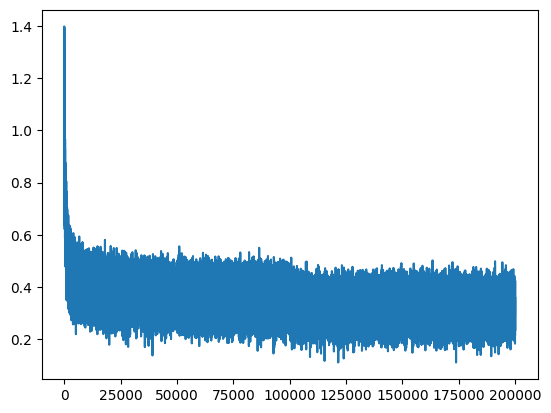

In [85]:
plt.plot(stepi,lossi)

In [86]:
emb = C[Xdev]
h= torch.tanh(emb.view(-1,30) @W1 +b1)
logits = h @W2 +b2
loss = F.cross_entropy(logits,Ydev)
loss.item()

2.162454843521118

In [87]:
emb = C[Xtr]
h= torch.tanh(emb.view(-1,30) @W1 +b1)
logits = h @W2 +b2
loss = F.cross_entropy(logits,Ytr)
loss.item()

2.1296632289886475

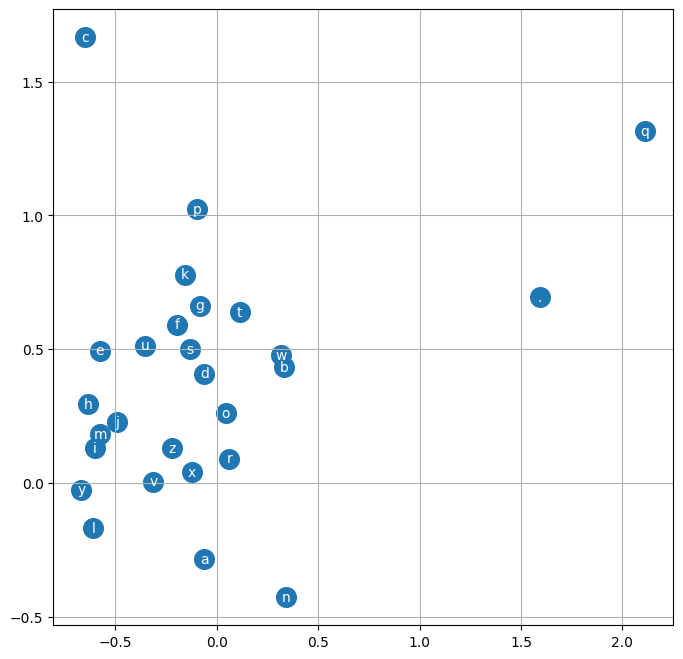

In [90]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [89]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
block_size=3
for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d) do not forget what this mwans
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)#taking only one example
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)#cross_entropy for calculating the loss during traning
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
americki.
kemri.
reviyah.
cassa.
jazhutefamerynt.
kaqui.
nellarahceniah.
kaleigh.
ham.
join.
quinthorline.
livani.
watelo.
dearynn.
jace.
pirsan.
edde.
oil.
gian.


### Here I am testing out something

In [18]:
'''
Now what does my neural network look like?
1. I have 6 inputs representing 3 chars because right now my blocksize is 3 chars
2. I will have 100 neurons[single layer of hidden layer] in my hidden layer
3. My output will be one character encoded with 2 numbers
Therefore I will have 100*6 points in my weight matrix
100 points of bias and one point of output bias
so lets work that out
'''
W1 =torch.randn((6,100))
b1 =torch.randn(100) 
'''
what does my encoded tensor input look like? it has a size of 32*3*2 that is thirty two examples of 3 words which are each represented by 2 numbers
I need to reduce the dimension to be of 32*6 so that I can input the 6 numbers as a vector/encoding
therefore first let me isolate each letter and get the 2 number representation for it and then concatenate them using the torch.cat function
'''
print(emb[:,0,:],emb[:,1,:],emb[:,2,:])
print(torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1))
reEmb = torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)
reEmb.shape

tensor([[-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.2061, -1.3544],
        [ 0.9611, -1.2574],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [ 0.1089,  0.0507],
        [ 2.2165, -1.0179],
        [-0.0932, -1.2847],
        [-1.3870,  0.2200],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.8281, -0.1751],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.0932, -1.2847],
        [-1.5268,  0.6350],
        [-0.8281, -0.1751],
        [ 1.0312,  0.2687],
        [-0.2061, -1.3544],
        [ 2.2165, -1.0179],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-1.5268,  0.6350],
        [ 0.1089,  0.0507],
        [-0.7241,  0.9141],
        [ 0.0594,  0.3370]]) tensor([[-0.7813,  0.8181],
        [-0.7813,  0.8181],
        [-0.2061, -1.3544],
        [ 0.9611, -

torch.Size([32, 6])

In [21]:
'''
the above is one way to do it but what if we change our block_size at some time?
'''
torch.cat(torch.unbind(emb,1),1).shape
'''
this basically takes all values present at a dimension and unpacks them into one dimension and replaced it in that dimension
for eg if we have x y and z dim and we want for there to be just x and y we call unbind on the y dim so that all dimensions within that can be unbound
to the y dimension
'''

torch.Size([32, 6])

In [23]:
'''
but there is an even efficient way to do this. As andrej karpathy says, all tensors are stored in memory as a one dimensional array and the way it
gets logcally viewed depends on the view attribute of the tensor so the current view of emb is 32x3x2 but we can change that to be (32x6) but how do we 
know that torch.cat and manipulating the view are same logcally?
'''

# emb.view(32,6) == torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

### It ends here